# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, datetime

### Get the data as a pandas Dataframe

In [2]:
energy = pd.read_csv("energy.csv", sep=",")

### Calculate the following

#### Shape (1 p)

In [3]:
energy.shape

(8737, 9)

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [4]:
# use filter or list comprehensions or for loops or dark magic
features= energy.columns[energy.columns!='datetime'].tolist()
features

['power_demand',
 'nuclear',
 'gas',
 'solar',
 'hydro',
 'coal',
 'wind',
 'spot_price']

#### How many NaN are there in the dataset? (1 p)

In [5]:
# "Dealing with missing values" in the slides
energy.isnull().sum().sum()

2541

#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [6]:
# pandas datetime functionalities
energy["datetime"]= pd.to_datetime(energy["datetime"],utc=True)

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [7]:
# pandas datetime functionalities
energy["year"] = energy["datetime"].dt.year
energy["month"] = energy["datetime"].dt.month
energy["day"] = energy["datetime"].dt.day
energy["hour"] =  energy["datetime"].dt.hour
energy["weekday"] = energy["datetime"].dt.weekday

#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [8]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions
energy["weekend"] = energy["weekday"].map(lambda x: True if(x>4) else False)

#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [9]:
# features is the list you created in the beginning
energy.groupby('weekday')[features].mean()

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [10]:
def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
energy["season"] = energy["datetime"].map(get_season)


#### Calculate average demand and spot_price for each season (1 p)

In [11]:
# seasons = {1:"winter",2:"winter",3:"spring",4:"spring",5:"spring",6:"summer",7:"summer",8:"summer",9:"fall",10:"fall",11:"fall",12:"winter"}
# energy['seasons'] = energy['month'].map(seasons)

In [12]:
energy.groupby('season')['power_demand','spot_price'].mean()

,power_demand,spot_price
season,,
fall,28212.959478,43.511058
spring,27112.771332,48.808877
summer,29269.888179,46.598832
winter,29482.937623,51.997609


#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

In [13]:
NaNSolar= round(energy['solar'].isnull().mean()*100,2)
print(f"The proportion of NaN in Solar is {NaNSolar}% , if we analyze it by hour:")
print("the NAN are associated with night,sunrising and sunset hours")
energy[energy['solar'].isnull()].groupby('hour').count().iloc[:,0].sort_values(ascending=False)

The proportion of NaN in Solar is 27.38% , if we analyze it by hour:
the NAN are associated with night,sunrising and sunset hours


hour
1     305
2     304
23    301
0     295
3     287
22    271
21    214
20    159
4     158
19     65
18     17
5      16
Name: datetime, dtype: int64

#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [14]:
# Income = energy_generated * price
# Cost = energy_bought * price
Dictionary = (
    energy[features[:-1]]
    .multiply(energy['spot_price'],axis='index')
    .rename(columns={'power_demand': 'consumption'})
    .sum().to_dict()
)
Dictionary


{'consumption': 12115827296.223953,
 'nuclear': 2674992442.1679893,
 'gas': 2577997502.6389947,
 'solar': 430157479.7849997,
 'hydro': 1179143190.6960022,
 'coal': 591516973.3599987,
 'wind': 2412917661.564993}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

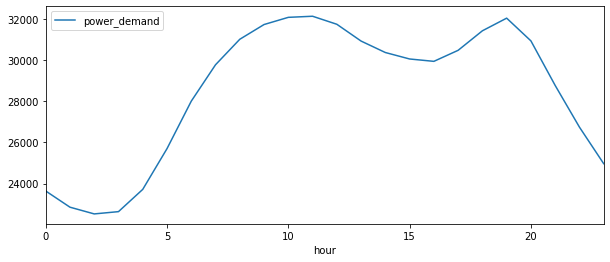

In [15]:
# Hourly average power demand
energy.groupby("hour").mean()[["power_demand"]].plot(figsize=(10, 4))

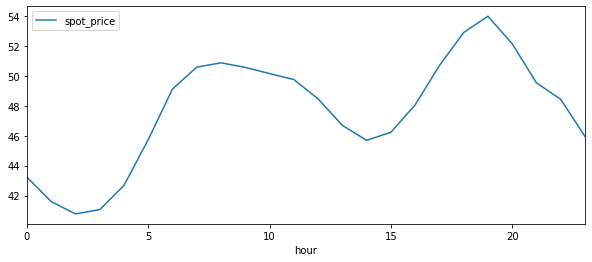

In [16]:
# Hourly average spot price
energy.groupby("hour").mean()[["spot_price"]].plot(figsize=(10, 4))

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [17]:
energy["wind_category"] = pd.cut(energy["wind"],bins=3,labels=['low','mid','high'])
energy["wind_category"].value_counts()

low     5140
mid     2907
high     690
Name: wind_category, dtype: int64

#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [18]:
# The most energy
index = energy[features[1:-1]].sum().idxmax()
value=  round(energy[features[1:-1]].sum().max(),2)
print(f" The {index} type has generated the most energy with total: {value} MWh")

 The nuclear type has generated the most energy with total: 55758093.0 MWh


In [19]:
# The least energy
index = energy[features[1:-1]].sum().idxmin()
value=  round(energy[features[1:-1]].sum().min(),2)
print(f" The {index} type has generated the least energy with total: {value} MWh")

 The solar type has generated the least energy with total: 8878077.8 MWh
